In [22]:
import os
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split


# Set project root to ml_project directory
if os.getcwd().endswith('src'):
    os.chdir('..')
    
project_root = os.getcwd()
print(f"Working directory: {project_root}")

# Load datasets
main_df = pd.read_pickle("data/merged_learn_dataset.pkl")

# Split
train_df, test_df = train_test_split(main_df, test_size=0.2, random_state=0)

Working directory: /Users/arthur/Documents/Universite/M2-QEA/Machine Learning/final_project/ml_project


In [23]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(n_jobs=-1)
rf_model.fit(train_df.drop(columns=['target']), train_df['target'])
predictions = rf_model.predict(test_df.drop(columns=['target']))


In [24]:

from sklearn.metrics import mean_squared_error
mse = mean_squared_error(test_df['target'], predictions)
rmse = np.sqrt(mse)
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")

Mean Squared Error: 0.019223741348886138
Root Mean Squared Error: 0.1386497073523278


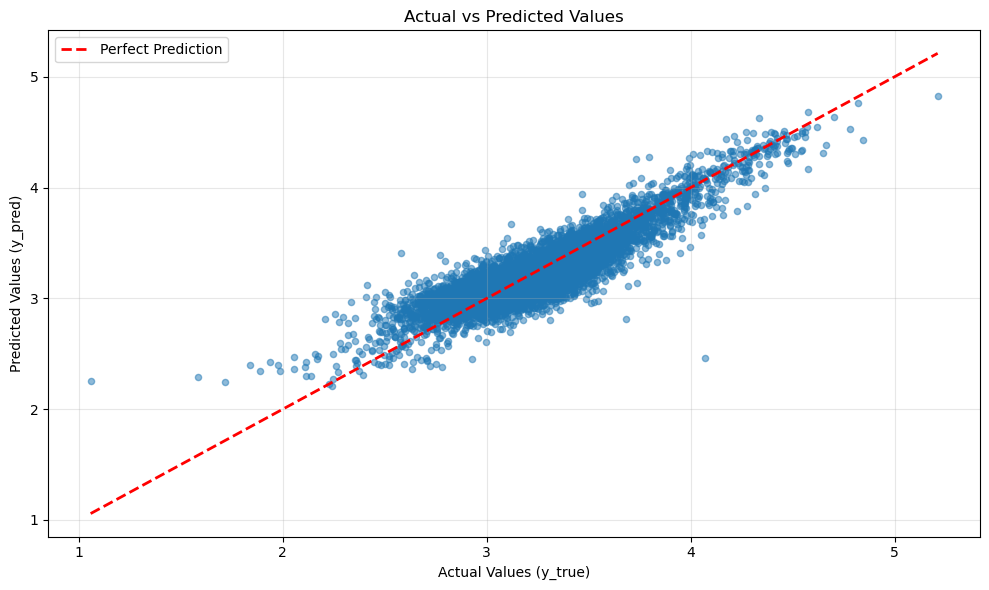

In [25]:
import matplotlib.pyplot as plt

# Create scatter plot of actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(test_df['target'], predictions, alpha=0.5, s=20)

# Add 45-degree line (perfect prediction line)
min_val = min(test_df['target'].min(), predictions.min())
max_val = max(test_df['target'].max(), predictions.max())
plt.plot([min_val, max_val], [min_val, max_val], 'r--', linewidth=2, label='Perfect Prediction')

plt.xlabel('Actual Values (y_true)')
plt.ylabel('Predicted Values (y_pred)')
plt.title('Actual vs Predicted Values')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()